In [2]:
# Code I referenced to complete project is cited in my report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
# Loading CSV file with motorcycle dataset

csv_file = "./Data/Motorcycle_Database.csv"

df = pd.read_csv(csv_file, encoding= 'unicode_escape')
df.head()

,Page URL,Image URL,Make,Model,Year of launch,Category,Rating,Price as new MSRP,Displacement cm3,Engine type,...,Oil capacity litres,Color options,Starter,Instruments,Electrical,Light,Carrying capacity,Factory warranty,Comments,Modifications compared to previous model
0,https://bikez.com/motorcycles/bmw_k_1_1993.php,https://bikez.com/pictures/bmw/1993/k 1.jpg,BMW,BMW K 1,1993,Unspecified category,67.6 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://bikez.com/motorcycles/bmw_k_1_1992.php,https://bikez.com/pictures/bmw/1992/k 1.jpg,BMW,BMW K 1,1992,Sport touring,69.2 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://bikez.com/motorcycles/bmw_k_1_1991.php,https://bikez.com/pictures/bmw/1991/k 1.jpg,BMW,BMW K 1,1991,Allround,71.7 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://bikez.com/motorcycles/bmw_k_1_1990.php,https://bikez.com/pictures/bmw/1990/k 1.jpg,BMW,BMW K 1,1990,Classic,67.4 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://bikez.com/motorcycles/bmw_k_1_1989.php,https://bikez.com/pictures/bmw/1989/k 1.jpg,BMW,BMW K 1,1989,Sport touring,65.7 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Making column names lowercase and replacing spaces, hyphens, and forward slashes with underscores

def clean_column_names(col):
    return col.lower().replace(' ', '_').replace('/', '_').replace('-', '_')

df.columns = [clean_column_names(col) for col in df.columns] 
df.head(1)

,page_url,image_url,make,model,year_of_launch,category,rating,price_as_new_msrp,displacement_cm3,engine_type,...,oil_capacity_litres,color_options,starter,instruments,electrical,light,carrying_capacity,factory_warranty,comments,modifications_compared_to_previous_model
0,https://bikez.com/motorcycles/bmw_k_1_1993.php,https://bikez.com/pictures/bmw/1993/k 1.jpg,BMW,BMW K 1,1993,Unspecified category,67.6 out of 100. Show full rating and compare ...,NaN,987.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking for columns with null values and their sum

df[df.columns[df.isnull().any()]].isnull().sum()

image_url                                    18
price_as_new_msrp                           302
engine_type                                 360
power_ps                                     31
power_rpm                                    42
                                           ... 
light                                       386
carrying_capacity                           376
factory_warranty                            364
comments                                    282
modifications_compared_to_previous_model    405
Length: 67, dtype: int64

In [6]:
df.columns[df.isnull().any()]

Index(['image_url', 'price_as_new_msrp', 'engine_type', 'power_ps',
       'power_rpm', 'torque_nm', 'torque_rpm', 'top_speed_kmph', '1_4_mil_sec',
       '0_100_km_h_sec', '60_140_km_h_sec', 'max_rpm', 'compression',
       'bore_x_stroke_mm', 'valves_per_cylinder', 'fuel_system',
       'fuel_control', 'ignition', 'lubrication_system', 'cooling_system',
       'gearbox', 'transmission_type_final_drive', 'clutch', 'driveline',
       'fuel_consumption_litres___100_km', 'greenhouse_gases_co2_g_km',
       'emission_details', 'exhaust_system', 'frame_type', 'rake_fork_angle',
       'trail', 'front_suspension', 'front_wheel_travel_mm', 'rear_suspension',
       'rear_wheel_travel_mm', 'front_tyre', 'rear_tyre', 'front_brakes',
       'front_brakes_diameter_mm', 'rear_brakes', 'rear_brakes_diameter_mm',
       'wheels', 'seat', 'dry_weight_kg', 'weight_incl_oil_gas_etc_kg',
       'power_weight_ratio_hp_kgp', 'seat_height_mm',
       'alternate_seat_height_mm', 'front_percentage_of_weigh

In [7]:
# For numeric columns, fill in null values with the column mean or mode based on the data type

def fill_null_values(col):
    if col.dtype == int or col.dtype == float:
        return col.fillna(round(col.mean()), inplace=True)
    else:
        return col.fillna(col.mode()[0], inplace=True)

[fill_null_values(df[col]) for col in ['power_ps',
       'power_rpm', 'torque_nm', 'torque_rpm', 'top_speed_kmph', '1_4_mil_sec',
       '0_100_km_h_sec', '60_140_km_h_sec', 'max_rpm', 'valves_per_cylinder',
       'fuel_consumption_litres___100_km', 'greenhouse_gases_co2_g_km',
         'front_wheel_travel_mm',
       'rear_wheel_travel_mm', 'front_brakes_diameter_mm', 'rear_brakes_diameter_mm',
        'dry_weight_kg', 'weight_incl_oil_gas_etc_kg',
       'power_weight_ratio_hp_kgp', 'seat_height_mm',
       'alternate_seat_height_mm', 'front_percentage_of_weight',
        'overall_height_mm', 'overall_length_mm',
       'overall_width_mm', 'ground_clearance_mm', 'wheelbase_mm',
       'fuel_capacity_litres', 'reserve_fuel_capacity_litres',
       'oil_capacity_litres']];


In [8]:
# Fill in string columns with "NA"

def make_string_na(col):
        return col.fillna('NA', inplace=True)

[make_string_na(df[col]) for col in ['image_url', 'price_as_new_msrp', 'engine_type', 'compression',
       'bore_x_stroke_mm', 'fuel_system',
       'fuel_control', 'ignition', 'lubrication_system', 'cooling_system',
       'gearbox', 'transmission_type_final_drive', 'clutch', 'driveline',
       'emission_details', 'exhaust_system', 'frame_type', 'rake_fork_angle',
       'trail', 'front_suspension','rear_suspension',
        'front_tyre', 'rear_tyre', 'front_brakes',
        'rear_brakes',
       'wheels', 'seat', 'color_options', 'starter', 'instruments',
       'electrical', 'light', 'carrying_capacity', 'factory_warranty',
       'comments', 'modifications_compared_to_previous_model']];


In [9]:
# Fill in empty column with 0

df['rear_percentage_of_weight'].fillna(0,inplace=True)

In [10]:
# Check if they're any null values left

df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

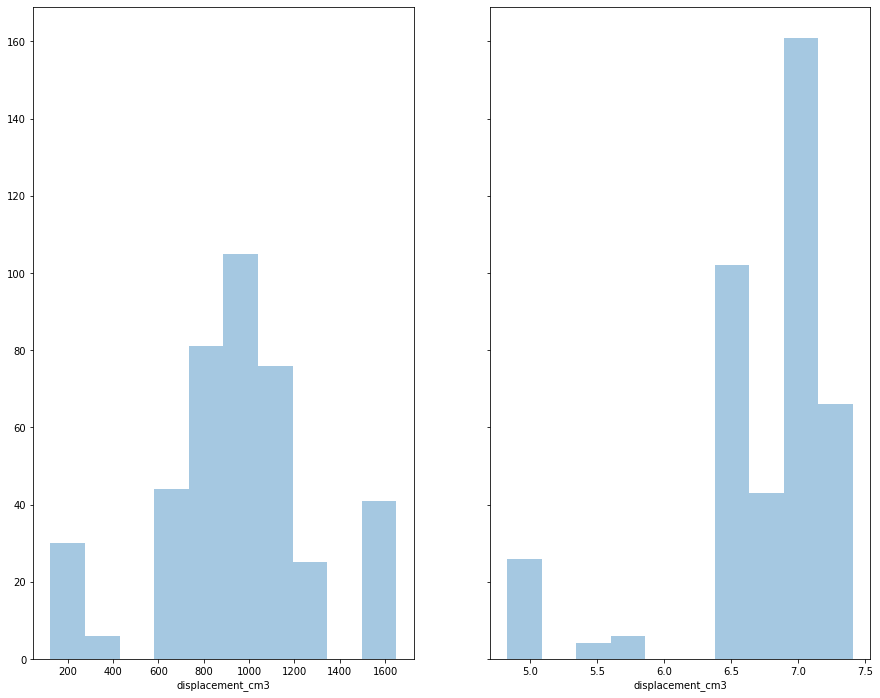

In [11]:
# Distribution of displacement variable with and without log

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,12), sharey=True)
fig.subplots_adjust(wspace=.2)

sns.distplot(df['displacement_cm3'], bins=10, kde=False, ax=ax1)
sns.distplot(np.log(df['displacement_cm3']), bins=10, kde=False, ax=ax2)

plt.savefig('distributuion.png')

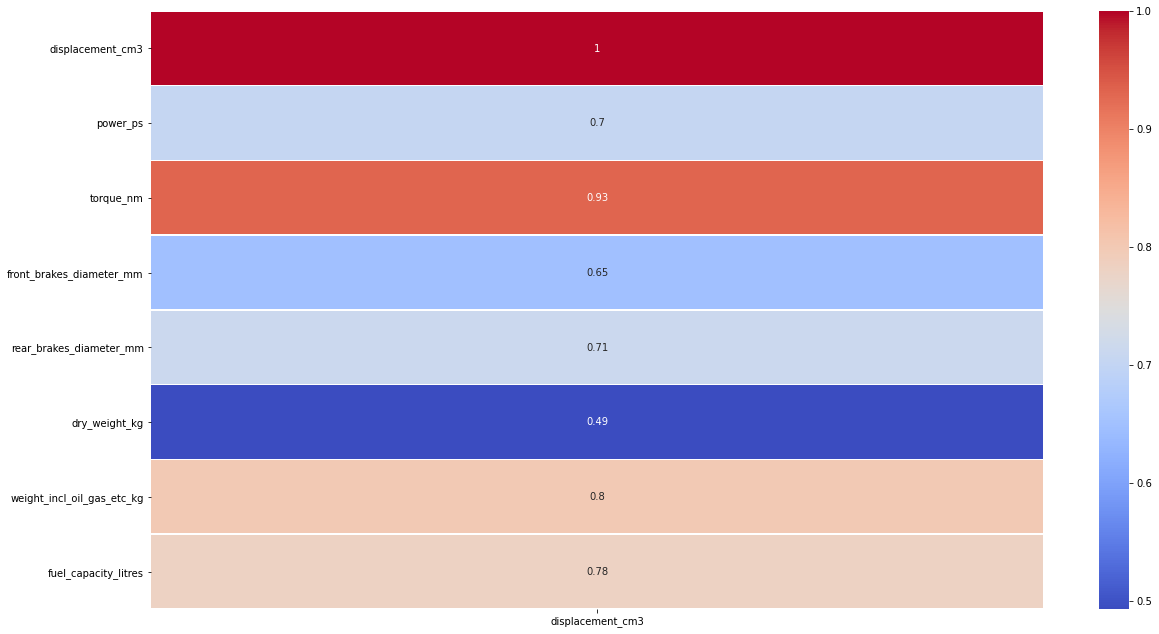

In [12]:
# Heatmap of features with correlation of 0.5 or greater to the displacement

plt.figure(figsize=(20, 11))

sns.heatmap(df.corr()[['displacement_cm3']][round(df.corr()['displacement_cm3'].sort_values(ascending=False), 1) >= .5], annot=True, cmap='coolwarm', linewidth=0.5)

plt.savefig('heatmap.png')

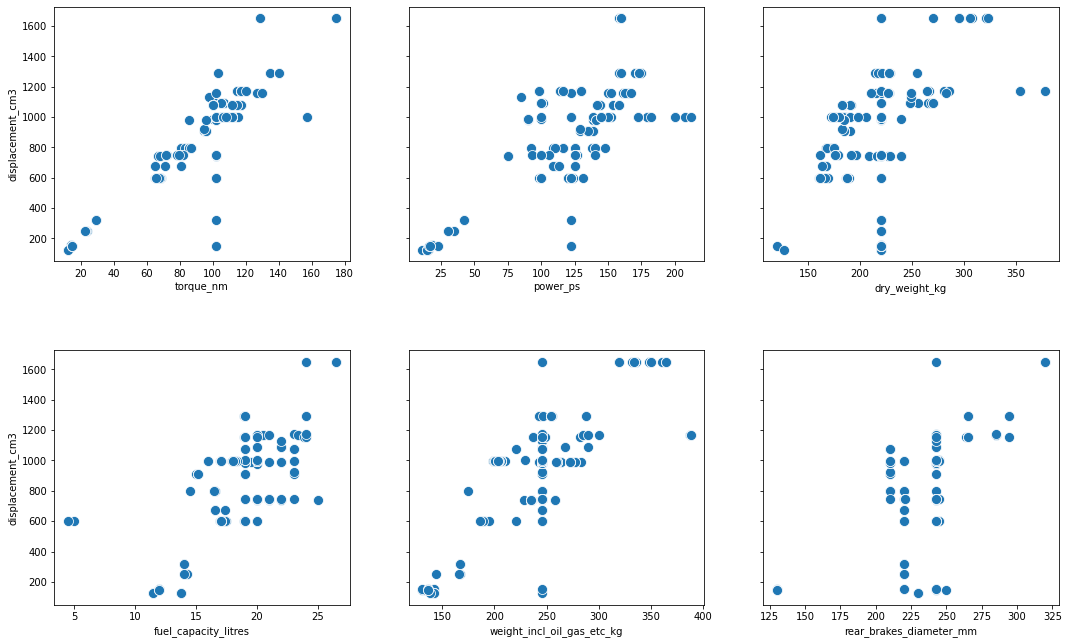

In [13]:
# Scatterplot of features from heatmap

fig, ax = plt.subplots(nrows=2, ncols=3, figsize= (18, 11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)

sns.scatterplot(x=df['torque_nm'], y=df['displacement_cm3'], ax=ax[0, 0], s=100 )
sns.scatterplot(x=df['power_ps'], y=df['displacement_cm3'], ax=ax[0, 1], s=100)
sns.scatterplot(x=df['dry_weight_kg'], y=df['displacement_cm3'], ax=ax[0, 2], s=100)
sns.scatterplot(x=df['fuel_capacity_litres'], y=df['displacement_cm3'], ax=ax[1, 0], s=100)
sns.scatterplot(x=df['weight_incl_oil_gas_etc_kg'], y=df['displacement_cm3'], ax=ax[1, 1], s=100)
sns.scatterplot(x=df['rear_brakes_diameter_mm'], y=df['displacement_cm3'], ax=ax[1, 2], s=100)

plt.savefig('scatterplot.png')

In [14]:
# Generating polynomial and interaction features

numerical_columns = df._get_numeric_data().columns
features = [col for col in numerical_columns if col != 'displacement_cm3']
X = df[features]
y = df['displacement_cm3']

p = PolynomialFeatures()
features_poly = p.fit_transform(df[features])
poly_df = pd.DataFrame(features_poly, columns=p.get_feature_names())

print(df.shape)
print(poly_df.shape)

(408, 75)
(408, 406)


In [15]:
# Splitting dataset into training and testing data. Then instantiating StandardScaler for Standardization.

X_train, X_test, Y_train, Y_test = train_test_split(poly_df, df['displacement_cm3'], test_size = 0.3, random_state = 5, shuffle = True)

ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [16]:
# Instantiating the models

linReg = LinearRegression()
lasso = LassoCV()
ridge = RidgeCV()

In [17]:
# Fitting my training data to the Linear Regression model

linReg.fit(X_train_sc, Y_train)
pred_train = linReg.predict(X_train_sc)
pred_test = linReg.predict(X_test_sc)

print('The RSME and R-squared value for the Linear Regression model on the training data is ' + str(np.sqrt(mean_squared_error(Y_train, pred_train))) + ' and '+ str(linReg.score(X_train_sc, Y_train)))

print()

print('The RSME and R-squared value for the Linear Regression model on the test data is ' + str(np.sqrt(mean_squared_error(Y_test, pred_test))) + ' and ' + str(linReg.score(X_test_sc, Y_test)))

The RSME and R-squared value for the Linear Regression model on the training data is 0.005364110279479476 and 0.9999999997769922

The RSME and R-squared value for the Linear Regression model on the test data is 2554.576189163124 and -42.48793921793886


In [18]:
# Fitting my training data to the Lasso Regression model

lasso.fit(X_train_sc,Y_train)
pred_train = lasso.predict(X_train_sc)
pred_test = lasso.predict(X_test_sc)

print('The RSME and R-squared value for the Lasso Regression model on the training data is ' + str(np.sqrt(mean_squared_error(Y_train, pred_train))) + ' and ' + str(lasso.score(X_train_sc, Y_train)))

print()

print('The RSME and R-squared value for the Lasso Regression model on the test data is ' + str(np.sqrt(mean_squared_error(Y_test, pred_test))) + ' and ' + str(lasso.score(X_test_sc, Y_test)))

The RSME and R-squared value for the Lasso Regression model on the training data is 57.79534545707654 and 0.9741112766777371

The RSME and R-squared value for the Lasso Regression model on the test data is 77.54728722931172 and 0.9599258492058861


In [19]:
# Fitting my training data to the Ridge Regression model

ridge.fit(X_train_sc, Y_train)
pred_train = ridge.predict(X_train_sc)
pred_test = ridge.predict(X_test_sc)

print('The RSME and R-squared value for the Ridge Regression model on the training data is ' + str(np.sqrt(mean_squared_error(Y_train, pred_train))) + ' and ' + str(lasso.score(X_train_sc, pred_train)))

print()

print('The RSME and R-squared value for the Ridge Regression model on the test data is ' + str(np.sqrt(mean_squared_error(Y_test, pred_test))) + ' and ' + str(lasso.score(X_test_sc, pred_test)))

The RSME and R-squared value for the Ridge Regression model on the training data is 45.14612180314436 and 0.9964681500500439

The RSME and R-squared value for the Ridge Regression model on the test data is 69.81532545839431 and 0.9962636035115052


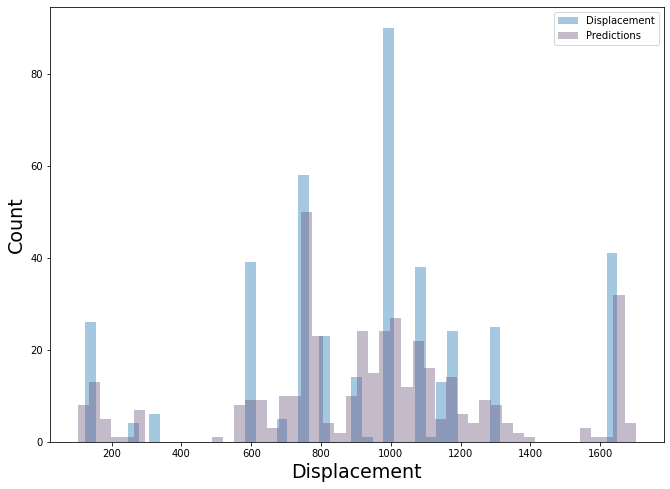

In [21]:
# Distribution of my predictions against the displacement variable

fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(df['displacement_cm3'], kde=False, bins=50, label='Displacement')
sns.distplot(ridge.predict(ss.transform(poly_df)), kde=False, color='#69547C', bins=50, label='Predictions')

plt.xlabel('Displacement',fontsize=19)
plt.ylabel('Count', fontsize=19)
plt.legend(loc='upper right')

plt.savefig('predictions.png')